In [84]:
using VaderSentiment
using Plots
analyzer = VaderSentiment.SentimentIntensityAnalyzer

VaderSentiment.SentimentIntensityAnalyzer

In [85]:
moving_average(vs,n) = [sum(@view vs[i:(i+n-1)])/n for i in 1:(length(vs)-(n-1))]

moving_average (generic function with 1 method)

In [86]:
CHAPTER_REGEX = r"CHAPTER .+\n\n.+\n"
SENTENCE_REGEX = r"(?<!\w\.\w.)(?<![A-Z][a-z]\.)(?<=\.|\?)\s"
BIBLE_REGEX = r"\d+:\d+ "

r"\d+:\d+ "

In [97]:
book_raw = read("war_peace.txt") |> String # Read in the book
book_raw = replace(book_raw, "*" => "", BIBLE_REGEX => "", "+" => "") # remove parts that arent text
# chapters = split(book_raw, CHAPTER_REGEX)[2:end] .|> strip # break book into chapters
# "Chapters: " * string(length(chapters))

SystemError: SystemError: opening file "war_peace.txt": No such file or directory

In [98]:
sentences = split(book_raw, SENTENCE_REGEX)

8639-element Vector{SubString{String}}:
 "Preliminary Matter."
 " \n\nThis text of Melville's Moby-Dick is based on the Hendricks House edition."
 "It was prepared by Professor Eugene F."
 "Irey at the University of Colorado."
 "Any subsequent copies of this d" ⋯ 107 bytes ⋯ "ence to Professor Irey's work."
 "\nEtymology  (Supplied by a late" ⋯ 85 bytes ⋯ "body, and brain; I see him now."
 "He was ever  dusting his old le" ⋯ 101 bytes ⋯ "he known nations of the world."
 "He loved to dust his old gramma" ⋯ 21 bytes ⋯ " reminded him of his mortality."
 "Extracts (supplied by a sub-sub" ⋯ 270 bytes ⋯ "whatsoever, sacred or profane."
 "Therefore you must not, in ever" ⋯ 99 bytes ⋯ " for veritable gospel\ncetology."
 ⋮
 "\nIT SO CHANCED, THAT AFTER THE " ⋯ 218 bytes ⋯ "KING BOAT, WAS DROPPED ASTERN."
 "SO, FLOATING ON THE MARGIN OF\n\n" ⋯ 135 bytes ⋯ "N TOWARDS THE CLOSING VO\nRTEX."
 "WHEN I REACHED IT, IT HAD SUBSIDED TO A CREAMY POOL."
 "ROUND AND ROUND\n, THEN, AND EVE" ⋯ 104 bytes ⋯ "E

In [99]:
scores = sentences .|> analyzer .|> x -> x.polarity_scores["compound"] 

8639-element Vector{Float64}:
  0.0258
  0.0
  0.2263
  0.0
  0.0
  0.6369
  0.0
  0.5994
 -0.8176
  0.0
  ⋮
  0.0
  0.0516
  0.1027
  0.4995
  0.886
  0.0
 -0.4588
  0.0
  0.0

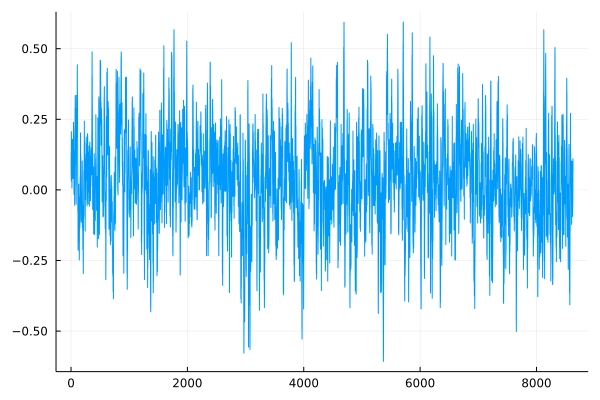

In [100]:
plot(moving_average(scores,10), label="")